In [ ]:
#pip install imblearn

### Importing Dataset & required Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing as scale
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, roc_curve, average_precision_score, precision_recall_curve
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_auc_score as AUC

In [2]:
df = pd.read_csv('Maintenance.csv')

### EDA

In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
#null values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [6]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [7]:
#duplicates
dups = df.duplicated()
print('Number of duplicate rows: %d' % dups.sum())

Number of duplicate rows: 0


Text(0.5, 1.05, 'Pearson correlation of Features')

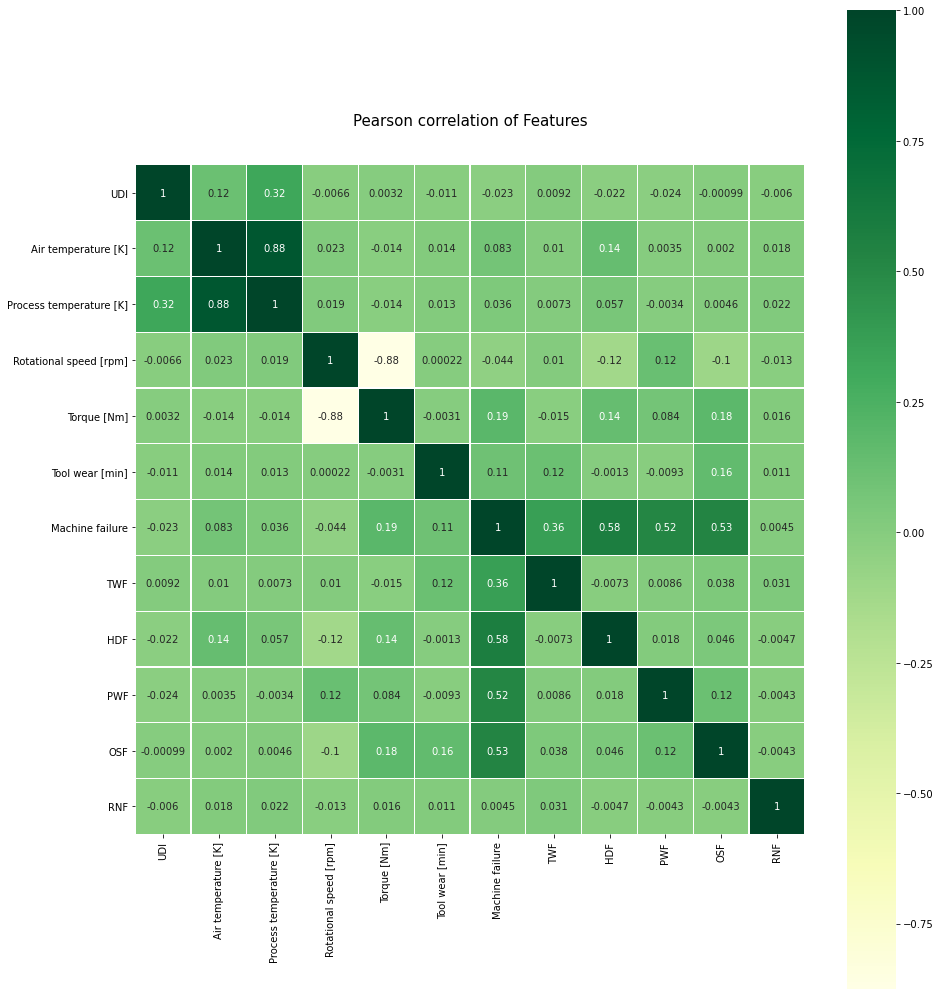

In [8]:
#Heatmap for Corelation
corr = df.corr()

f, ax = plt.subplots(figsize=(15,18))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

In [9]:
#machine failure counts with subgroups
df[['Machine failure','TWF', 'HDF', 'PWF', 'OSF', 'RNF']].apply(pd.value_counts)

,Machine failure,TWF,HDF,PWF,OSF,RNF
0,9661,9954,9885,9905,9902,9981
1,339,46,115,95,98,19


#subgroups of machine failure counts
df[df['Machine failure'] == 1][['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].apply(pd.value_counts)

#failures with respect to TWF
df[df['TWF'] == 1][[ 'Machine failure','HDF', 'PWF', 'OSF', 'RNF']].apply(pd.value_counts)

#failures with respect to HDF
df[df['HDF'] == 1][['Machine failure', 'TWF', 'PWF', 'OSF', 'RNF']].apply(pd.value_counts)

#failures with respect to PWF
df[df['PWF'] == 1][['Machine failure','TWF', 'HDF', 'OSF', 'RNF']].apply(pd.value_counts)

#failures with respect to OSF
df[df['OSF'] == 1][[ 'Machine failure','TWF', 'HDF', 'PWF', 'RNF']].apply(pd.value_counts)

#failure with respect to RNF
df[df['RNF'] == 1][[ 'Machine failure','TWF', 'HDF', 'PWF', 'OSF']].apply(pd.value_counts)

+ Overstrain failure occurs with TWF, HDF, PWF together.
+ RNF failures don't occur together.

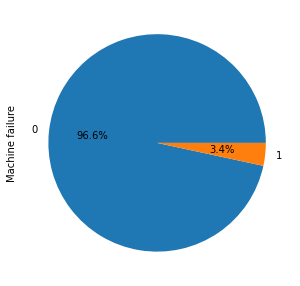

In [10]:
#pie for total machine failures
df['Machine failure'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%')
plt.show()

In [11]:
#pie for all the subgroups failure contribution
Pie={'TWF': df.TWF.sum(), 'HDF':df.HDF.sum(), 'PWF':df.PWF.sum(), 'OSF': df.OSF.sum(), 'RNF': df.RNF.sum()}

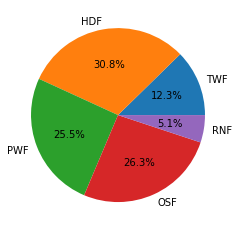

In [12]:
plt.pie(Pie.values(),labels=Pie.keys(),autopct='%1.1f%%');

In [19]:
#types of machine quality
df['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

<AxesSubplot:>

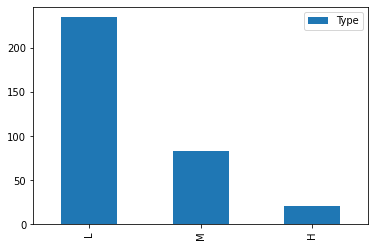

In [21]:
#failure with respect to Type
df[df['Machine failure'] == 1][[ 'Type']].apply(pd.value_counts).plot(kind='bar')

+ Lowest Quality type has the most failures
+ Followed by Medium and High

In [ ]:
# machine failure with respect to all the numerical features

#df[df['Machine failure'] == 1][['Air temperature [K]']].plot(kind='kde')
#df[df['Machine failure'] == 1][['Process temperature [K]']].plot(kind='kde')
#df[df['Machine failure'] == 1][['Rotational speed [rpm]']].plot(kind='kde')
#df[df['Machine failure'] == 1][['Torque [Nm]']].plot(kind='kde')
#df[df['Machine failure'] == 1][['Tool wear [min]']].plot(kind='kde')


In [ ]:
#features= ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]',
           'Torque [Nm]','Tool wear [min]','Machine failure','TWF', 'HDF', 'PWF', 'OSF', 'RNF']

In [ ]:
#features= ['Type','Machine failure','TWF', 'HDF', 'PWF', 'OSF', 'RNF']

### Feature Engineering - Label Encoder

In [75]:
#label Encoding type column
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
df['Type']= label.fit_transform(df['Type'])

### Detection of outliers - (Isolation Forest) 

In [76]:
from sklearn.ensemble import IsolationForest

In [77]:
outlier_model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2))

outlier_model.fit(df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]',
           'Torque [Nm]','Tool wear [min]']])


IsolationForest(contamination=0.2)

In [78]:
#predicting anomalies
df['scores'] = outlier_model.decision_function(df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]',
           'Torque [Nm]','Tool wear [min]']])

df['anomaly_score'] = outlier_model.predict(df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]',
           'Torque [Nm]','Tool wear [min]']])

df[df['anomaly_score']==-1]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,scores,anomaly_score
14,15,L47194,1,298.6,309.2,2035,19.6,40,0,0,0,0,0,0,-0.058250,-1
50,51,L47230,1,298.9,309.1,2861,4.6,143,1,0,0,1,0,0,-0.155173,-1
69,70,L47249,1,298.9,309.0,1410,65.7,191,1,0,0,1,1,0,-0.032559,-1
70,71,M14930,2,298.9,309.0,1924,22.6,193,0,0,0,0,0,0,-0.017955,-1
85,86,M14945,2,299.0,309.0,1804,26.8,17,0,0,0,0,0,0,-0.012606,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9939,9940,H39353,0,298.3,308.1,2636,12.8,84,0,0,0,0,0,0,-0.140778,-1
9970,9971,H39384,0,298.4,308.1,1891,24.7,158,0,0,0,0,0,0,-0.011863,-1
9974,9975,L57154,1,298.6,308.2,1361,68.2,172,1,0,0,1,1,0,-0.043044,-1
9988,9989,L57168,1,298.9,308.6,1771,24.1,213,0,0,0,0,0,0,-0.021505,-1


### Dealing with outliers - Undersampling of majority class outliers 

In [79]:
count = df[df['anomaly_score']==-1]

In [80]:
count[count['Machine failure']==1]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,scores,anomaly_score
50,51,L47230,1,298.9,309.1,2861,4.6,143,1,0,0,1,0,0,-0.155173,-1
69,70,L47249,1,298.9,309.0,1410,65.7,191,1,0,0,1,1,0,-0.032559,-1
160,161,L47340,1,298.4,308.2,1282,60.7,216,1,0,0,0,1,0,-0.068927,-1
161,162,L47341,1,298.3,308.1,1412,52.3,218,1,0,0,0,1,0,-0.005166,-1
168,169,L47348,1,298.4,308.3,1433,62.3,20,1,0,0,1,0,0,-0.019249,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,1,298.6,309.8,2271,16.2,218,1,1,0,0,0,0,-0.135962,-1
9764,9765,L56944,1,298.5,309.5,1294,66.7,12,1,0,0,1,0,0,-0.049425,-1
9822,9823,L57002,1,298.5,309.4,1360,60.9,187,1,0,0,0,1,0,-0.005675,-1
9830,9831,L57010,1,298.3,309.3,1337,56.1,206,1,0,0,0,1,0,-0.016354,-1


In [81]:
df[(df['Machine failure']==0) & (df['anomaly_score']==-1)].index

Int64Index([  14,   70,   85,   91,  101,  110,  153,  155,  169,  172,
            ...
            9849, 9865, 9871, 9912, 9919, 9926, 9939, 9970, 9988, 9991],
           dtype='int64', length=1777)

In [82]:
#dropping outliers where machine faliure is zero
droped_df= df.drop(df[(df['Machine failure']==0) & (df['anomaly_score']==-1)].index)

In [83]:
droped_df['Machine failure'].value_counts()

0    7884
1     339
Name: Machine failure, dtype: int64

### Balancing the dataset -  Oversampling using SMOTE

In [84]:
droped_df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,scores,anomaly_score
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0.024993,1
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0.025946,1
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0.013807,1
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0.034624,1
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0.045178,1


In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
X=droped_df.iloc[:,[2,3,4,5,6,7,9,10,11,12,13]]
y=droped_df.iloc[:,8]
print(X.shape,y.shape)

(8223, 11) (8223,)


In [87]:
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)

x_smote, y_smote = smote.fit_resample(X, y)

In [88]:
from collections import Counter

In [89]:
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 7884, 1: 339})
Resample dataset shape Counter({0: 7884, 1: 7884})


In [90]:
processed_df = x_smote
processed_df['Machine failure'] = y_smote
processed_df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


### Checking for originality of data

##### 1. Distribution of Type  

In [116]:
o_type = df['Type'].value_counts(normalize=True)
p_type = processed_df['Type'].value_counts(normalize=True)

print('The distribution of "Type" in original data:\n',o_type.mul(100).round(1).astype(str)+' %')
print('\nThe distribution of "Type" in processed data:\n',p_type.mul(100).round(1).astype(str)+' %')

The distribution of "Type" in original data:
 1    60.0 %
2    30.0 %
0    10.0 %
Name: Type, dtype: object

The distribution of "Type" in processed data:
 1    70.7 %
2    18.8 %
0    10.5 %
Name: Type, dtype: object


<AxesSubplot:title={'center':'Processed Data'}>

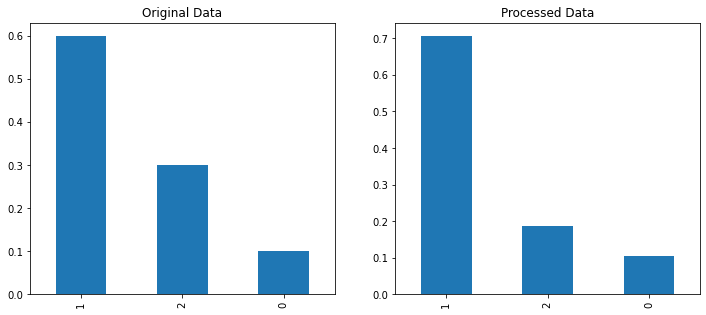

In [136]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Original Data')
o_type.plot(kind='bar')
plt.subplot(1,2,2)
plt.title('Processed Data')
p_type.plot(kind='bar')

##### 2. Comparison on Mean and Standard Deviation 

In [157]:
mean_std = pd.DataFrame()

mean_std['Original Mean'] = df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]',
           'Torque [Nm]','Tool wear [min]']].mean()
mean_std['Processed Mean'] = processed_df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]',
           'Torque [Nm]','Tool wear [min]']].mean()
mean_std['Original SD'] = df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]',
           'Torque [Nm]','Tool wear [min]']].std()
mean_std['Processed SD'] = processed_df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]',
           'Torque [Nm]','Tool wear [min]']].std()

mean_std

,Original Mean,Processed Mean,Original SD,Processed SD
Air temperature [K],300.00493,300.363461,2.000259,1.816976
Process temperature [K],310.00556,310.094891,1.483734,1.195316
Rotational speed [rpm],1538.77610,1504.186961,179.284096,282.153913
Torque [Nm],39.98691,45.245479,9.968934,13.386042
Tool wear [min],107.95100,125.340183,63.654147,68.867467


##### 3. Distribution of failure types 

In [158]:
o_pie={'TWF': df.TWF.sum(), 'HDF':df.HDF.sum(), 'PWF':df.PWF.sum(), 'OSF': df.OSF.sum(), 'RNF': df.RNF.sum()}
p_pie={'TWF': processed_df.TWF.sum(), 'HDF':processed_df.HDF.sum(), 'PWF':processed_df.PWF.sum(), 'OSF': processed_df.OSF.sum(), 'RNF': processed_df.RNF.sum()}

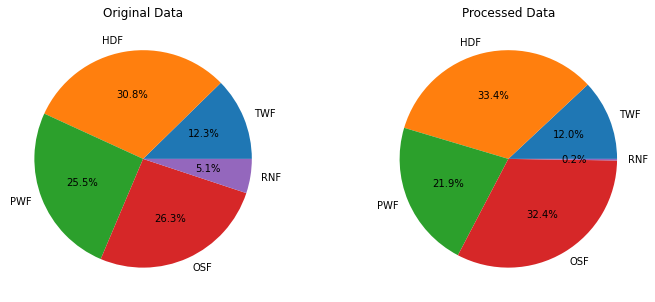

In [159]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Original Data')
plt.pie(o_pie.values(),labels=o_pie.keys(),autopct='%1.1f%%');
plt.subplot(1,2,2)
plt.title('Processed Data')
plt.pie(p_pie.values(),labels=p_pie.keys(),autopct='%1.1f%%');

### Model Building

##### Train Test split 

In [160]:
# Splitting predictor and target variables
X=df.iloc[:,2:8]
y=df.iloc[:,8]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 1. Logistic Regression 

In [174]:
LR_model=LogisticRegression()
fit=LR_model.fit(X_train, y_train)

In [175]:
#prediction on test set
y_pred = LR_model.predict(X_test)
predictions = pd.Series(y_pred)

In [181]:
#predictions where failure is "1"
y_pred_df= pd.DataFrame({'actual': y_test,
                         'prediction': y_pred})

y_pred_df[y_pred_df['prediction']== 1]

,actual,prediction
5334,1,1
5615,1,1
4302,0,1
7569,1,1
4254,1,1
3856,0,1
1654,0,1
4960,0,1
4024,1,1
4191,0,1


In [237]:
parameters = LR_model.coef_
print(parameters)

[[-0.02894898  0.91207007 -0.99519701  0.01141479  0.27526212  0.01320908]]


In [184]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.036
MSE: 0.036
RMSE: 0.18973665961010275


In [185]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:','\n', confusion)

Confusion Matrix: 
 [[1917    8]
 [  64   11]]


In [186]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1925
           1       0.58      0.15      0.23        75

    accuracy                           0.96      2000
   macro avg       0.77      0.57      0.61      2000
weighted avg       0.95      0.96      0.95      2000



Text(0, 0.5, 'True Positive Rate')

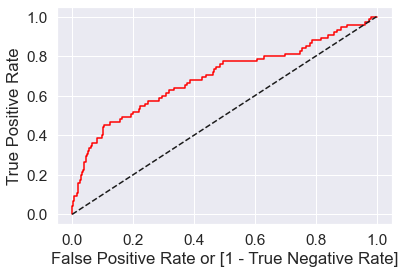

In [236]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, LR_model.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


#### 2. Decision Tree Classifier

In [188]:
#decision tree classifier
DT = DecisionTreeClassifier(random_state=12)
model_dt = DT.fit(X_train,y_train)
pred_dt= model_dt.predict(X_test)

#print(model_dt.feature_importances_ )
report = classification_report(y_test, pred_dt)
cm_dt = confusion_matrix(y_test, pred_dt)
print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm_dt)
print(type(y_test),type(pred_dt))

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1925
           1       0.62      0.71      0.66        75

    accuracy                           0.97      2000
   macro avg       0.81      0.85      0.82      2000
weighted avg       0.97      0.97      0.97      2000

Confusion matrix:
[[1893   32]
 [  22   53]]
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


In [189]:
roc_auc_score(y_test,pred_dt)

0.8450216450216449

#### 3. Random Forest 

In [190]:
#rf = RandomForestClassifier(max_depth = 2,random_state=1)
rf = RandomForestClassifier(n_estimators=25, min_samples_split=25, \
                            max_depth=5,random_state=72)
model_rf = rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

report = classification_report(y_pred, pred_rf)
cm_rf = confusion_matrix(y_test, pred_rf)

print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm_rf)

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1981
           1       0.50      0.58      0.54        19

    accuracy                           0.99      2000
   macro avg       0.75      0.79      0.77      2000
weighted avg       0.99      0.99      0.99      2000

Confusion matrix:
[[1922    3]
 [  56   19]]


#### 4. Gaussian Naive Bayes

In [191]:
gnb = GaussianNB()
modelgnb = gnb.fit(X_train,y_train)
pred_gnb = modelgnb.predict(X_test)

report = classification_report(y_pred, pred_gnb)
cm_gnb = confusion_matrix(y_test, pred_gnb)
print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm_gnb)

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1981
           1       0.32      0.58      0.42        19

    accuracy                           0.98      2000
   macro avg       0.66      0.78      0.70      2000
weighted avg       0.99      0.98      0.99      2000

Confusion matrix:
[[1906   19]
 [  60   15]]


#### 5. SVM

In [192]:
modelsvc = SVC(kernel='linear')
modelsvc.fit(X_train,y_train)
pred_svm = modelsvc.predict(X_test)


report = classification_report(y_pred, pred_svm)
cm_SVM = confusion_matrix(y_test, pred_dt)
print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm_SVM)

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       0.92      0.63      0.75        19

    accuracy                           1.00      2000
   macro avg       0.96      0.82      0.87      2000
weighted avg       1.00      1.00      1.00      2000

Confusion matrix:
[[1893   32]
 [  22   53]]


#### 6. 2nd Method Random Forest

In [193]:
#scaling train dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [194]:
# Fitting Random Forest Classification to the Training set

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [195]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [196]:
classifier.score(X_test, y_test) #model score for test

0.9755

In [197]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal','Inner Race (0.007")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       0.98      0.99      0.99      1925
Inner Race (0.007")       0.78      0.48      0.60        75

           accuracy                           0.98      2000
          macro avg       0.88      0.74      0.79      2000
       weighted avg       0.97      0.98      0.97      2000



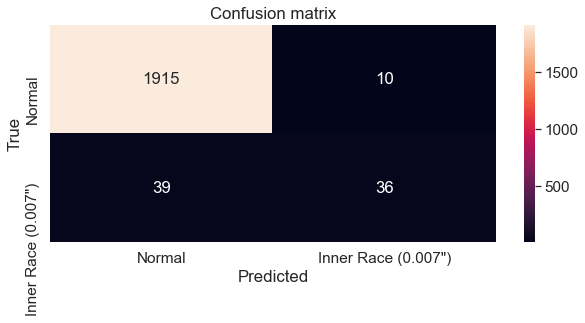

In [198]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal','Inner Race (0.007")']  
columns = ['Normal','Inner Race (0.007")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [199]:
normal, IR = cm
anomalies = normal[1] + IR[0]
print("Anomalies: {}".format(anomalies))

Anomalies: 49


#### 7. ANN

In [200]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [201]:
print(X_train.shape, y_test.shape)

(8000, 6) (2000,)


In [202]:
classifier = Sequential()

In [203]:
classifier.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))
classifier.add(Dense(4, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(1,kernel_initializer = 'uniform', activation = 'sigmoid'))

In [204]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [205]:
model = classifier.fit(X_train, y_train, batch_size = 1000, epochs = 100, shuffle = False)

Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.9336
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.9670
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.9670
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.9670
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.9670
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.9670
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.9670
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.9670
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.9670
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.9670
Epoch 11/100
8/8 [===========

In [206]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

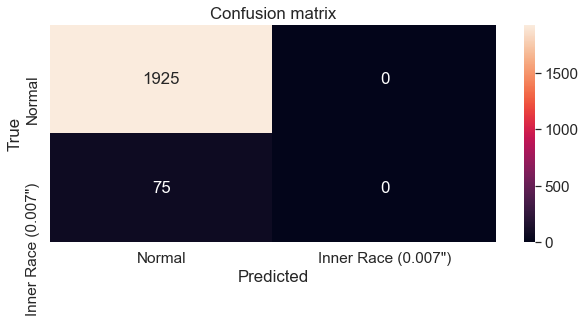

In [207]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal', 'Inner Race (0.007")']  
columns = ['Normal', 'Inner Race (0.007")']  
cm_df = pd.DataFrame(cm2,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.show()

In [208]:
classifier.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.1272 - accuracy: 0.9625


[0.1272355318069458, 0.9624999761581421]

In [209]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal', 'Inner Race (0.007")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       0.96      1.00      0.98      1925
Inner Race (0.007")       0.00      0.00      0.00        75

           accuracy                           0.96      2000
          macro avg       0.48      0.50      0.49      2000
       weighted avg       0.93      0.96      0.94      2000



In [210]:
normal, IR = cm
anomalies = normal[1] + IR[0]
print("Anomalies: {}".format(anomalies))

Anomalies: 49


#### 8. Autoencoder

In [211]:
from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
import tensorflow as tf

In [212]:
from numpy.random import seed
seed(10)
tf.random.set_seed(10)
act_func = 'relu'

In [213]:
# Input layer:
autoencoder=Sequential()
# First hidden layer, connected to input vector X. 
autoencoder.add(Dense(32, activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_test.shape[1],)
               )
         )

autoencoder.add(Dense(2, activation=act_func, kernel_initializer='glorot_uniform'))

autoencoder.add(Dense(32, activation=act_func, kernel_initializer='glorot_uniform'))

autoencoder.add(Dense(X_test.shape[1], kernel_initializer='glorot_uniform'))


autoencoder.compile(loss='mse',optimizer='adam', metrics=['accuracy'])

autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                224       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 198       
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [214]:
NUM_EPOCHS=100
BATCH_SIZE=1000
history=autoencoder.fit(X_train,y_train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  verbose = 1,
                  shuffle = True)

Epoch 1/100
8/8 [==============================] - 1s 25ms/step - loss: 0.0404 - accuracy: 0.3304 - val_loss: 0.0454 - val_accuracy: 0.4137
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0338 - accuracy: 0.4568 - val_loss: 0.0423 - val_accuracy: 0.5275
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0319 - accuracy: 0.5322 - val_loss: 0.0414 - val_accuracy: 0.5825
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0314 - accuracy: 0.5931 - val_loss: 0.0410 - val_accuracy: 0.6100
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0312 - accuracy: 0.6183 - val_loss: 0.0408 - val_accuracy: 0.6162
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0311 - accuracy: 0.6154 - val_loss: 0.0407 - val_accuracy: 0.6075
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0310 - accuracy: 0.5961 - val_loss: 0.0407 - val_accuracy: 0.1600
Epoch 8/100
8/8 [=========

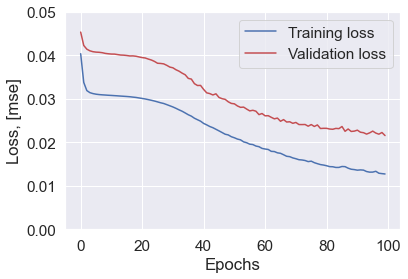

In [215]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.05])
plt.show()

In [216]:
pred_train = autoencoder.predict(X_train)

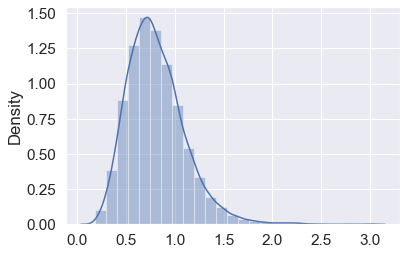

In [217]:
import seaborn as sns

scored_train = np.mean(np.abs(pred_train-X_train), axis = 1)
plt.figure()
g = sns.distplot(scored_train, bins = 25, kde= True);
#g.set(xlim=(0.05,0.10), ylim=(0, 1))
plt.show()

In [218]:
TH = 0.1

scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(pred_train- X_train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

scored_train

,Loss_mae,Threshold,Anomaly
0,0.464979,0.1,True
1,0.746689,0.1,True
2,0.279490,0.1,True
3,1.321870,0.1,True
4,0.995895,0.1,True
...,...,...,...
7995,0.892156,0.1,True
7996,0.662209,0.1,True
7997,0.808884,0.1,True
7998,0.729900,0.1,True


In [219]:
scored_train['Loss_mae'].mean()

0.8085595250481427

<AxesSubplot:>

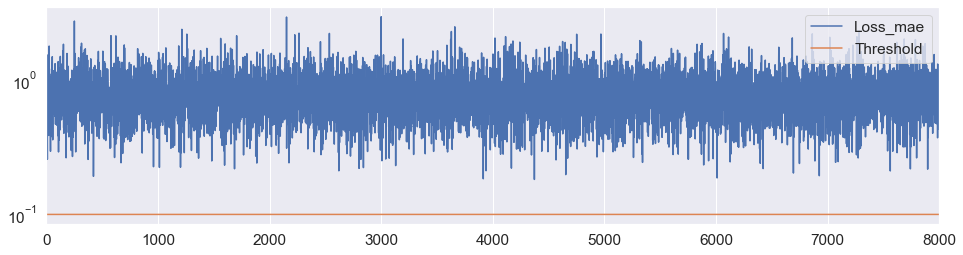

In [220]:
scored_train.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_train)])

In [221]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.464979,0.1,True
1,0.746689,0.1,True
2,0.279490,0.1,True
3,1.321870,0.1,True
4,0.995895,0.1,True
...,...,...,...
7995,0.892156,0.1,True
7996,0.662209,0.1,True
7997,0.808884,0.1,True
7998,0.729900,0.1,True


In [222]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

      Loss_mae  Threshold  Anomaly
0     0.464979        0.1     True
1     0.746689        0.1     True
2     0.279490        0.1     True
3     1.321870        0.1     True
4     0.995895        0.1     True
...        ...        ...      ...
7995  0.892156        0.1     True
7996  0.662209        0.1     True
7997  0.808884        0.1     True
7998  0.729900        0.1     True
7999  0.728867        0.1     True

[8000 rows x 3 columns]
(8000, 3)


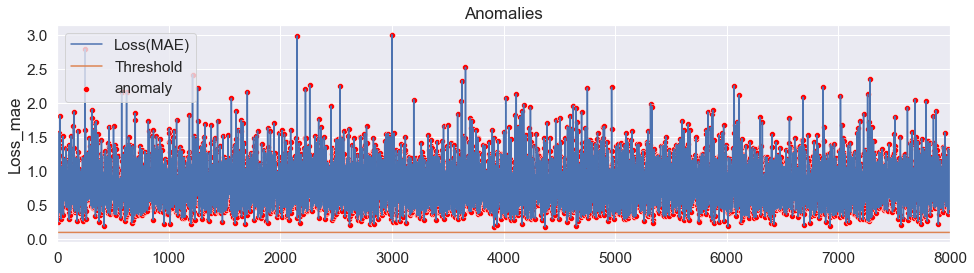

In [223]:
f, (ax1) = plt.subplots(figsize=(16, 4))
ax1.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
ax1.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_train.index)))
plt.title('Anomalies')
plt.legend();

In [224]:
pred_test = autoencoder.predict(X_test)

In [225]:
score = autoencoder.evaluate(X_test,y_test)
score

63/63 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.2780


[0.019065845757722855, 0.27799999713897705]

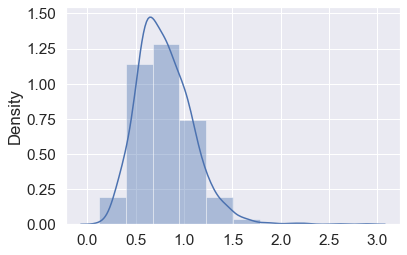

In [226]:
import seaborn as sns

scored_test = np.mean(np.abs(pred_test-X_test), axis = 1)
plt.figure()
g = sns.distplot(scored_test, bins = 10, kde= True);
#g.set(xlim=(1,1.5), ylim=(0, 0.5))
plt.show()

In [227]:
scored_test = pd.DataFrame()
scored_test['Loss_mae'] = np.mean(np.abs(pred_test-X_test), axis = 1)
scored_test['Threshold'] = TH
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']

scored_test

,Loss_mae,Threshold,Anomaly
0,0.977375,0.1,True
1,1.167291,0.1,True
2,0.511079,0.1,True
3,0.466007,0.1,True
4,1.291482,0.1,True
...,...,...,...
1995,1.123588,0.1,True
1996,0.329363,0.1,True
1997,0.648644,0.1,True
1998,0.387928,0.1,True


In [228]:
scored_test['Loss_mae'].mean()

0.8000768071463253

<AxesSubplot:>

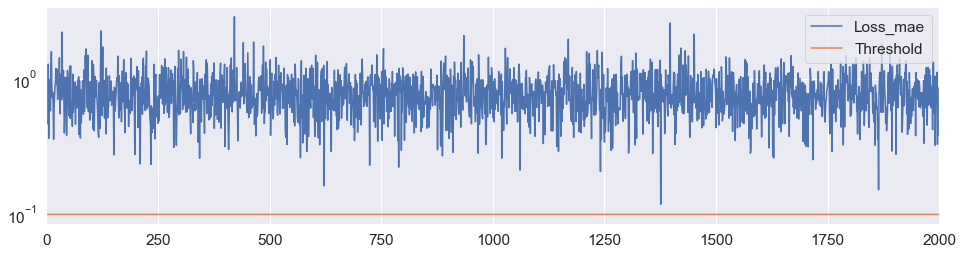

In [229]:
scored_test.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_test)])

In [230]:
IR_anomalies = scored_test[scored_test['Anomaly'] == True]
print(IR_anomalies)
print(IR_anomalies.shape)

      Loss_mae  Threshold  Anomaly
0     0.977375        0.1     True
1     1.167291        0.1     True
2     0.511079        0.1     True
3     0.466007        0.1     True
4     1.291482        0.1     True
...        ...        ...      ...
1995  1.123588        0.1     True
1996  0.329363        0.1     True
1997  0.648644        0.1     True
1998  0.387928        0.1     True
1999  0.860777        0.1     True

[2000 rows x 3 columns]
(2000, 3)


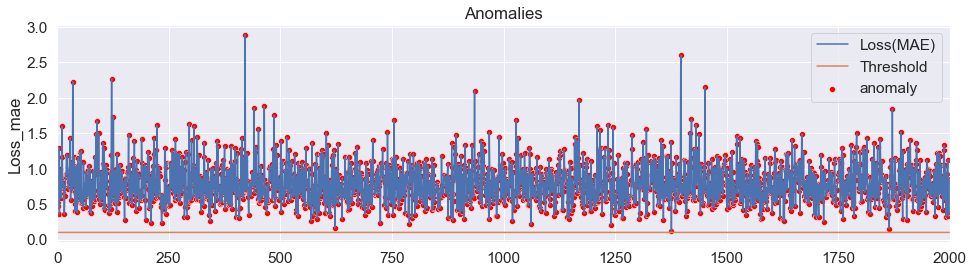

In [231]:
f, (ax2) = plt.subplots(figsize=(16, 4))
ax2.plot(scored_test.index, scored_test.Loss_mae, label='Loss(MAE)');
ax2.plot(scored_test.index, scored_test.Threshold, label='Threshold')
g = sns.scatterplot(x=IR_anomalies.index , y=IR_anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_test.index)))
plt.title('Anomalies')
plt.legend();

In [232]:
print(score[1])

0.27799999713897705


In [233]:
print("Accuracy: {:.2f}%".format(score[1]*100))

Accuracy: 27.80%


In [234]:
print("Anomalies: {}".format(IR_anomalies['Anomaly'].count()))

Anomalies: 2000
